# Lineare Regression in Python
Bei der Explorativen Datenanalyse haben wir mehrere lineare Zusammenhänge vermutet. Lineare Regression ist das Tool, um diese Vermutungen (Hypothesen) zu formulieren und zu analysieren.

## 0. Vorbereitung: Import der benötigten Python-Libraries 
Libraries enthalten Funktionalitäten, die über den Standard von Python herausgehen, und die wir für unsere Arbeit verwenden können. 

`pandas` und `numpy` enthalten häufig verwendete Datentypen (z.B. *data frames*), `seaborn` und `matplotlib` sind populäre libraries zur Datenvisualisierung. Wir werden diese Libraries häufig verwenden.

In [1]:
!pip install pandas
!pip install seaborn
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

In [2]:
# zusätzliche Library:
import sklearn as sklearn

**Wichtig**: Falls Sie nach dem Statement folgende Fehlermeldung bekommen:
        
`ModuleNotFoundError: No module named 'sklearn'`

Installieren Sie scikit-learn in Anaconda im entsprechenden Environment. Das Package heisst auf Anaconda `scikit-learn`, muss dann aber hier als `sklearn` importiert werden - das ist in der Tat etwas verwirrend.

## 1. Laden der Daten

***Aufgabe***: Verwenden Sie den Befehl aus dem vorherigen Notebook, um die Daten zu laden. Wir verwenden wiederum die Datei `car_data.csv` - kopieren Sie diese wiederum in den gleichen Ordner wie dieses Notebook. Sie können die Datei auf Ihrem Gerät kopieren, oder nochmals aus Ilias herunterladen.

Speichern Sie die Werte als Data Frame ab, und nenne Sie die Variable `car_df`.

***==> Antwort***: Wir verwenden die gleiche Anweisung wie letzte Woche:

In [3]:
car_df = pd.read_csv("car_data.csv")

Mit diesem Befehl werden die Daten aus der Datei `car_data.csv` in ein Data Frame gleaden und dieses dann der Variable `car_df` zugewiesen.

Da hier eine Zuweisung geschieht gibt diese Anweisung keine Ausgabe. Wir können den Wert der Variable `car_df` aber abfragen, in dem wie z.B. direkt den Variablennamen eingeben. Alternativen wären z.B. die Funktionen `head(...)` und `tail(...)`, wie wir sie in der vergangenen Woche verwendet haben, um die ersten bzw. die letzten Zeilen anzeigen zu lassen.

In [4]:
car_df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


**<==**

## 2. Vorverarbeitung der Daten
Wir werden die Daten mit den gleichen Schritten vorverarbeiten wie im Notebook zu Explorativer Datenanalsye. Wir werden allerdings die Transformation der Verbrauchsangabe (MGP zu Liter pro 100km) am Anfang durchführen und danach die nicht mehr benötigten Daten in einem Schritt entfernen.

### 2.1. Transformation von Werten
Wir transformieren die (in den USA übliche) Angabe in MPG in die in der Schweiz übliche Messung in l pro 100km.

***Aufgabe***: Führen Sie die für die Transformation nötigen Schritte durch.

***==> Antwort***:
Wir können hier die gleice Funktion `mpg_to_lpro100km` wie vergangene Woche verwenden. 

In [5]:
# Definition der Funktion
def mpg_to_lpro100km(mpg):
    # converts miles per gallon to liters per 100 km
    return (100 * 3.785411784) / (mpg * 1.609344)

# Anwenden der Funktion auf die Spalte 'city mpg' und Zuweisung der 
# Werte als neue Spalte 'Verbrauch Innerorts'
car_df['Verbrauch Innerorts'] = mpg_to_lpro100km( car_df['city mpg'])

# Analog für highway MPG bzw. den Verbrauch Ausserorts:
car_df['Verbrauch Ausserorts'] = mpg_to_lpro100km( car_df['highway MPG'])

Das Data Frame hat nun zwei neue Spalten (ganz rechts dargestellt):

In [6]:
car_df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Verbrauch Innerorts,Verbrauch Ausserorts
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,12.379715,9.046715
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,12.379715,8.400521
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,11.760729,8.400521
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,13.067477,8.400521
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500,13.067477,8.400521


**<===**

### 2.2. Entfernen irrelevanter Daten
Wir wollen uns wie vergangene Woche auf einige der Attribute beschränken und entfernen deshalb wiederum die nicht benötigten Attribute. 

In [7]:
car_df = car_df.drop(['Market Category', 'Vehicle Style', 'Popularity', 'Vehicle Size', 
                      'highway MPG', 'city mpg'], axis=1)
car_df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,MSRP,Verbrauch Innerorts,Verbrauch Ausserorts
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,46135,12.379715,9.046715
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,40650,12.379715,8.400521
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,36350,11.760729,8.400521
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,29450,13.067477,8.400521
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,34500,13.067477,8.400521


### 2.3. Entfernung von Duplikaten

In [8]:
duplicate_rows_df = car_df[car_df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape[0])

number of duplicate rows:  815


***Aufgabe:*** Entfernen Sie die Duplikate (1 Befehl). Überprüfen Sie die Anzahl Zeilen im Datensatz vor und nach der Anweisung, und überzeugen Sie sich, dass der Datensatz nun entsprechend weniger Zeilen enthält.

***==> Antwort:*** 
Wir fragen die Grösse des Data Frames `car_df` vor und nach dem Befehl `drop_duplicates()` ab:

In [11]:
car_df.shape

(11914, 12)

In [12]:
car_df = car_df.drop_duplicates()

In [13]:
car_df.shape

(11099, 12)

Die Anzahl Zeilen hat sich um die Anzahl Duplikate verringert, während die Anzahl Spalten wie erwartet gleich geblieben ist:

In [9]:
11914-11099

815

**<==**

### 2.4. Umbenennen von Spalten
Als letzter Vorbereitungsschritt wollen wir die Attribute auf Deutsch und zu bei uns gängigen Bezeichnungen umbenennen. 
MSRP steht für *manufacturer''s suggested retail price*, also sowas wie *unverbindliche Preisempfehlung*; wir benennen das der Einfachheit halber einfach als `Preis`:

In [10]:
car_df = car_df.rename(columns={'Make': 'Marke',
                                'Model': 'Modell',
                                'Engine Fuel Type': 'Treibstoff',
                                'Engine HP': 'PS',
                                'Engine Cylinders': 'Zylinder',
                                'Driven_Wheels': 'Antrieb',
                                'Number of Doors': 'Tueren',
                                'Transmission Type': 'Schaltung',
                                'MSRP': 'Preis',
                                'Verbrauch Ausserorts': 'Verbrauch_Ausserorts',
                                'Verbrauch Innerorts': 'Verbrauch_Innerorts',
                               })

**Bemerkung**: Die letzten beiden Zeilen sorgen dafür, dass die Spalte `Verbrauch Ausserorts` auf `Verbrauch_Ausserorts` umbennant wird (und ebenso wird `Verbrauch Innerorts` in `Verbrauch_Innerorts` umbenannt). Wir brauchen für die kommende Analyse Attributnamen ohne Lehrzeichen - wir hätten diese Attribute natürlich auch gleich direkt so anlegen können, statt sie hier umzubenennen.

## 3. Modell Trainieren und Analysieren
In diesem Kapitel wollen wir eine erste Hypothese formulieren. Wir tun dies am Beispiel der Hypothese **'Für Autos mit Preis unter 50'000 US-\\$ hängt der Verbrauch innerorts von der Motorenstärke ab.'**

## 3.1.: Visualisierung
Wir stellen einen Plot dar, um die Hypothese genauer zu untersuchen:

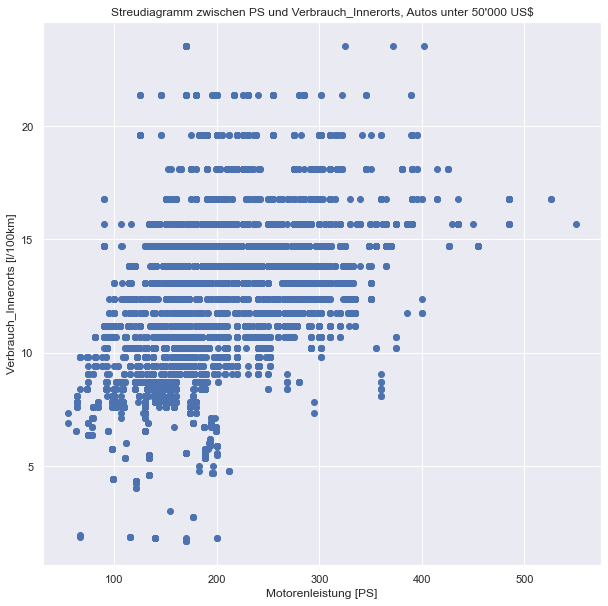

In [11]:
cars_u50k = car_df[ car_df['Preis']<50000 ]
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(cars_u50k['PS'], cars_u50k['Verbrauch_Innerorts'])
plt.title('Streudiagramm zwischen PS und Verbrauch_Innerorts, Autos unter 50\'000 US$')
ax.set_xlabel('Motorenleistung [PS]')
ax.set_ylabel('Verbrauch_Innerorts [l/100km]')
plt.show()

Um die Daten etwas genauer zu verstehen, verwenden wir eine neue Funktion (`pairplot` aus der Library `seaborn`):

**Bemerkung**: Wenn die Anweisung unten einen Fehler oder einen leeren Plot ergibt, so liegt das vermutlich an einer nicht mehr aktuellen Version der library `matplotlib`. Aktualisieren Sie die Library, oder überspringen Sie zur Not die nächste Python-Anweisung.

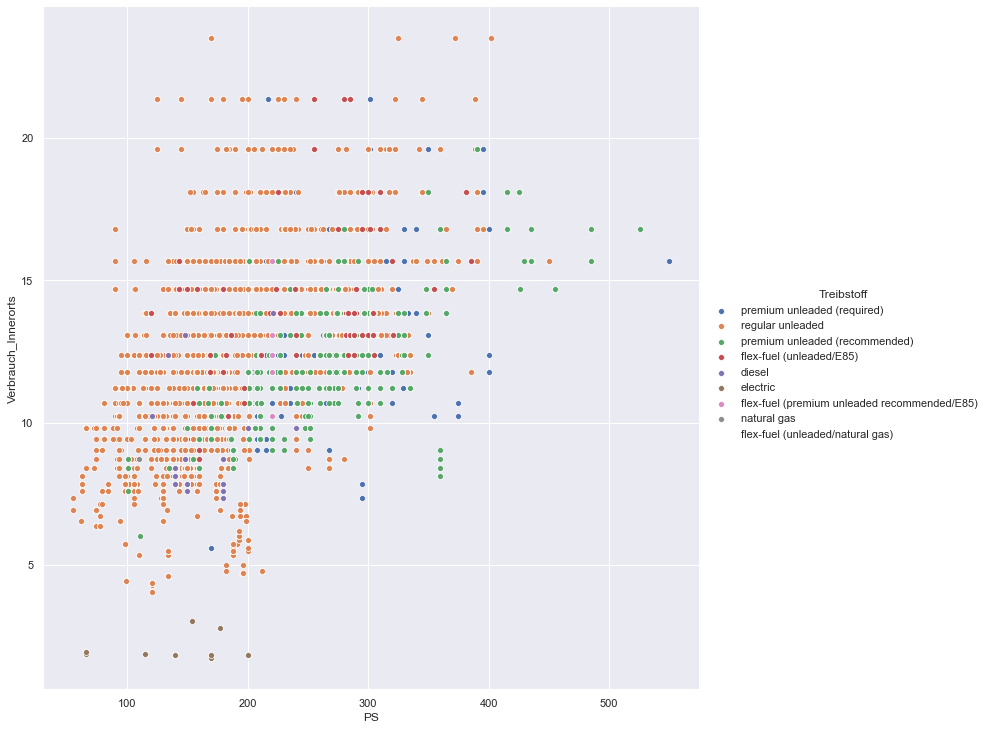

In [16]:
cars_u50k = car_df[ car_df['Preis']<50000 ]
sns.pairplot(x_vars=["PS"], y_vars=["Verbrauch_Innerorts"], 
             data=cars_u50k, hue="Treibstoff", height=10)

Wir können hier den Trend identifizieren. Wir sehen aber auch einige Ausreisser: sehr stark motorisierte Fahrzuege. Zudem scheint es bei den Elektroautos wirklich einen Zusammenhang gibt zwischen `Verbrauch Innerorts` und `PS`. Wir beschränken uns deshalb auf die Fahrzeuge mit Treibstoff `regular unleaded` und weniger als 500 PS und erstellen die gleiche Grafik danach nochmals mit diesem Datenset:

In [19]:
rel_cars_unleaded =  car_df[(car_df["PS"]<500) &
                            (car_df["Treibstoff"]=="regular unleaded") ]

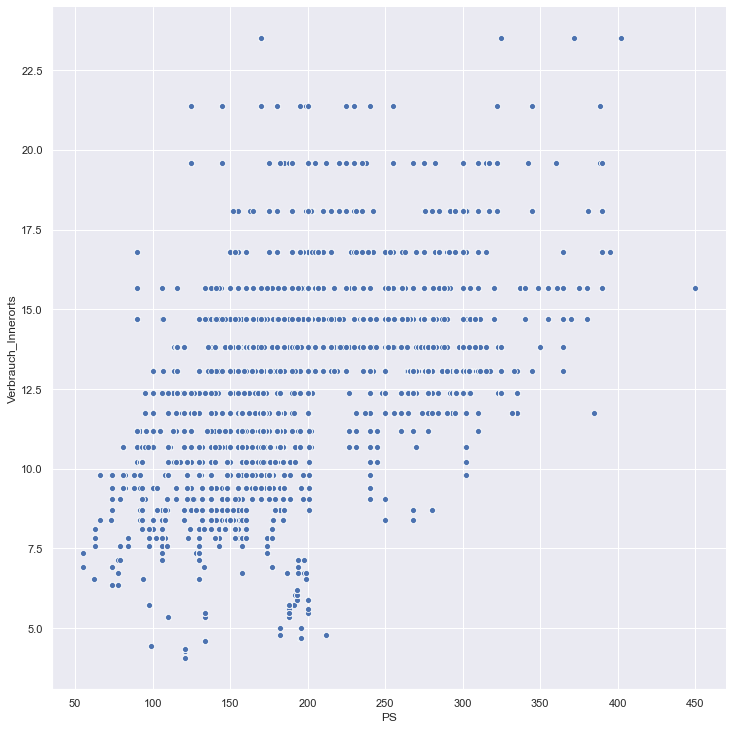

In [21]:
sns.pairplot(x_vars=["PS"], y_vars=["Verbrauch_Innerorts"], 
             data=rel_cars_unleaded, height=10)

**Bemerkung**: Falls die Anweisung oben keine sinnvolle Grafik ergibt, so sollten Sie mit der folgenden Anweisung eine ähnliche Graphik erzeugen können:

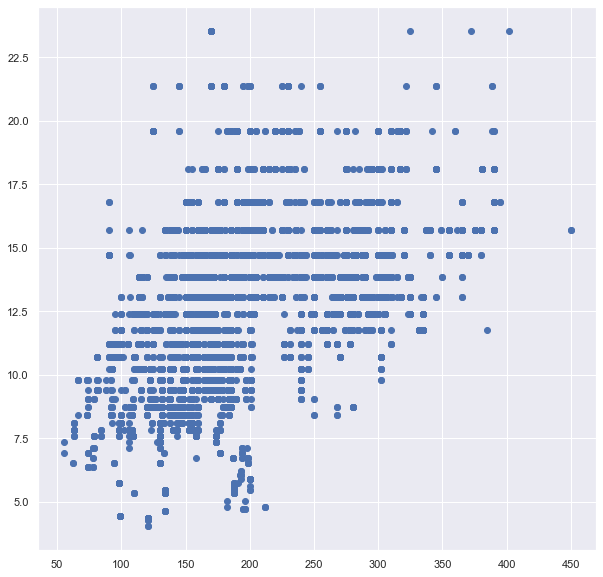

In [22]:
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(rel_cars_unleaded["PS"], rel_cars_unleaded["Verbrauch_Innerorts"])

## 3.2.: Modell formulieren & trainieren
Wir verwenden hier eine weitere Library: `statsmodels` (`scikit-learn` hat auch Funktionen für ein lineares Modell, allerdings sind die Analysen beispielsweise zur Qualität des fittings weniger umfangreich).

In [23]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

Jetzt können wir das Modell definieren, fitten, und eine Zusammenfassung anzeigen lassen:

**Definieren**: Wir geben Python an, dass der Verbrauch in linearer Abhängigkeit der Motorenstärke modelliert werden soll. Wir benutzen dafür die Notation `Verbrauch_Innerorts ~ PS`. Als Datenset übergebne wir dem Modell unserer Auswahl an Autos: `data=rel_cars_unleaded`. Als Resultat bekommen wir ein Objekt vom Typ `OLS` (ordinary least squares):

In [24]:
lmf_PS_inn = smf.ols('Verbrauch_Innerorts ~ PS', data=rel_cars_unleaded)
lmf_PS_inn

**Trainieren / "Fitten"**: Mit der Auswahl der Modelle haben wir auch festgelegt, welche Parameter im Momdell verwendet werden - beim linearen Modell sind das die Steigung und der Y-Achsen-Abschnitt. Mit dem Befehl `fit()` werden diese Paramete auf Grund der übergebenen Daten angepasst (daher der Begriff *fitting*) bzw. *gelernt*:

In [25]:
lmf_PS_inn_fitted = lmf_PS_inn.fit()

**Zusammenfassung des Modells:** Schliesslich können wir mit dem Befehl `summary()` die wichtigsten Kennzahlen zum gelernten Modell anzeigen:

In [26]:
lmf_PS_inn_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Verbrauch_Innerorts   R-squared:                       0.260
Model:                             OLS   Adj. R-squared:                  0.260
Method:                  Least Squares   F-statistic:                     2515.
Date:                 Thu, 01 Oct 2020   Prob (F-statistic):               0.00
Time:                         11:59:50   Log-Likelihood:                -17502.
No. Observations:                 7158   AIC:                         3.501e+04
Df Residuals:                     7156   BIC:                         3.502e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.9432      0.100     79.160      0.000       7.747       8.140
PS             0.0232      0.000     50.148      0.000       0.022       0.024
==============================================================================
Omnibus:                      406.314   Durbin-Watson:                   0.231
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              512.717
Skew:                           0.557   Prob(JB):                    4.62e-112
Kurtosis:                       3.692   Cond. No.                         660.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 3.3. Residuen bestimmen und analysieren
Wir haben gesehen, dass die Residuen den nicht erklärten Teil der abhängigen Variable (hier: `Verbrauch_Innerorts`) darstellt. Wir wollen diese deshalb weiter untersuchen, um festzustellen, wie gut das Modell auf die Daten passt.

Mit der folgenden Anweisung können wir das Modell für die Vorhersage auf Grund der `PS` verwenden:

In [27]:
lmf_PS_inn_fitted.predict( rel_cars_unleaded["PS"] )

17       11.929928
18       11.929928
19       11.929928
20       11.929928
21       11.929928
           ...    
11844    15.638500
11881    12.416678
11882    12.416678
11883    11.883570
11913    13.065678
Length: 7158, dtype: float64

Wir erstellen ein neues DataFrame mit der einzelnen Spalte `Verbrauch Innerorts (Predicted)`:

In [29]:
VerbrI_PRED = pd.DataFrame(lmf_PS_inn_fitted.predict(rel_cars_unleaded["PS"]), columns = ['Verbrauch Innerorts (Predicted)'])
VerbrI_PRED

,Verbrauch Innerorts (Predicted)
17,11.929928
18,11.929928
19,11.929928
20,11.929928
21,11.929928
...,...
11844,15.638500
11881,12.416678
11882,12.416678
11883,11.883570


Als nächstes berechnen wir das Residuum und speichern dieses als weitere Spalte in das neue Data Frame:

In [30]:
VerbrI_PRED['Residuum'] = rel_cars_unleaded['Verbrauch_Innerorts'] - VerbrI_PRED['Verbrauch Innerorts (Predicted)']

Wir erstellen einen scatterplot, um das Residuum darzustellen:

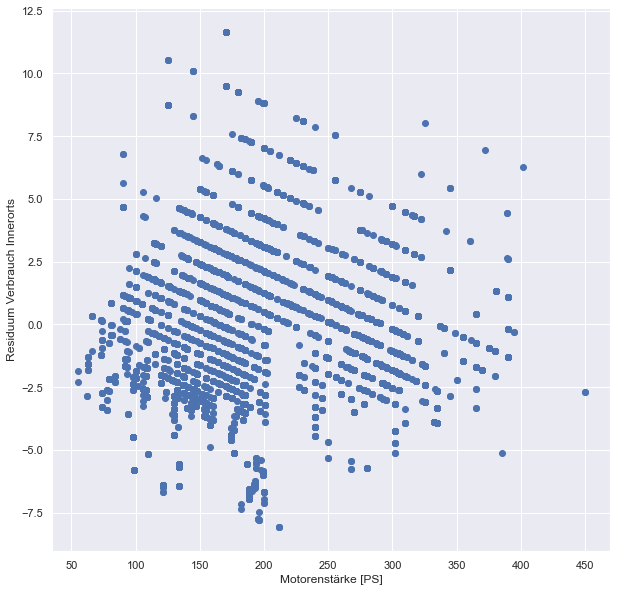

In [31]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(rel_cars_unleaded["PS"], VerbrI_PRED['Residuum'])
ax.set_xlabel('Motorenstärke [PS]')
ax.set_ylabel('Residuum Verbrauch Innerorts')
plt.show()

Um den mean squared error zu bestimmen, müssen wir zuerst alle Fehler quadrieren, und danach den Mittelwert bestimmen:

In [27]:
(VerbrI_PRED['Residuum']**2).mean()

7.209164180575268

In [28]:
(VerbrI_PRED['Residuum']).mean()

1.4347605328489167e-15

***Aufgabe***: Bestimmen Sie die Quartile der Residuen, und erstellen Sie einen Boxplot über die Residuen. Interpretieren Sie die Resultate.

## 4. Vorhersage für neue Daten
Wir wollen unser Modell auch verwenden, um für neue Autos eine Vorhersage des Verbrauches zu machen. Dazu ist es **extrem wichtig, dass wir zwei verschiedene Datensets haben:**
 
1. Das ***Trainings-Datenset***, mit dem wir das Modell anpassen
2. Der ***Test-Datenset***, mit dem wir die Qualität des Modells bestimmen.
    
Nur so können wir eine zuverlässige Aussage dazu machen, wie gut das Modell für neue Modelle funktioniert.

Wir werden hier die Autos nach Baujahr in zwei Gruppen unterteilen. Hier sehen Sie die Anzahl Autos pro Baujahr:

In [60]:
car_df['Year'].value_counts().sort_index()

1990     123
1991     152
1992     177
1993     209
1994     163
1995     135
1996     131
1997     175
1998     154
1999     120
2000     118
2001     168
2002     205
2003     238
2004     235
2005     213
2006     205
2007     345
2008     349
2009     379
2010     298
2011     285
2012     387
2013     366
2014     589
2015    2170
2016    2157
2017    1668
Name: Year, dtype: int64

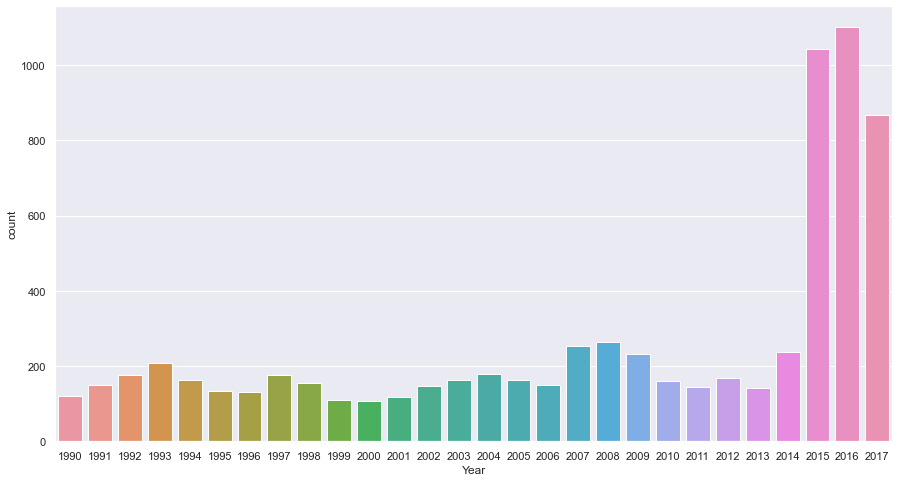

In [38]:
fig, main_ax = plt.subplots(figsize=(15,8))
sns.countplot(x="Year", data=rel_cars_unleaded)

***Aufgabe:*** 

* Führen Sie die Analyse wie im Kapitel 3 durchgeführt für eine Ihrer eigenen Hypothesen durch. Verwenden Sie dabei eine Hypothese, die nicht vom Baujahr der Fahrzeuge abhängt.
* Machen Sie eine Aufteilung der Autos in alle mit Baujahr <2015, und verwenden Sie diese als Trainingsdaten. Die neueren Autos (mit Baujahr 2015 oder später) verwenden Sie als Testdaten. 
* Formulieren Sie ihre Hypothese als Formel (also analog wie `'Verbrauch_Innerorts ~ PS'` oben), trainieren Sie ein entsprechendes Modell, und untersuchen Sie, wie genau die Resultate des  Modells auf den Testdaten stimmen. Verwenden Sie dazu die Code-Stücke von weiter oben.